# Week 12 - Milestone Two week

# 1. Lesson: no lesson this week.  Milestone Two is due!

# 2. Weekly graph question

Suppose you plot the number visitors to a museum over the seven days of a week; then again the following week.  Can you suggest the advantages and disadvantages of the following two ways of presenting the data?

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of visitors')

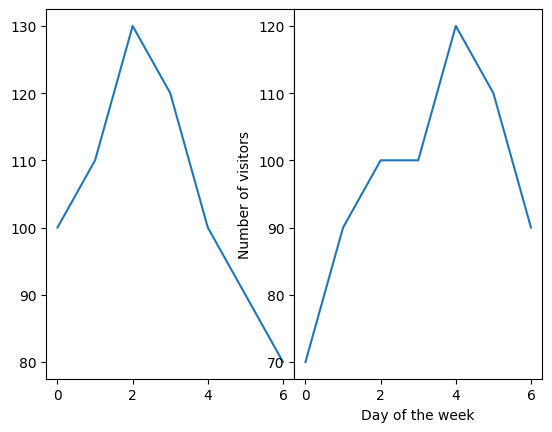

In [3]:
np.random.seed(0)
time_series_0 = np.array([100, 110, 130, 120, 100, 90, 80])
time_series_1 = np.array([70, 90, 100, 100, 120, 110, 90])
fig, axs = plt.subplots(1, 2)
axs[0].plot(time_series_0)
axs[1].plot(time_series_1)
plt.subplots_adjust(wspace = 0)
plt.xlabel("Day of the week")
plt.ylabel("Number of visitors")

Text(0, 0.5, 'Number of visitors')

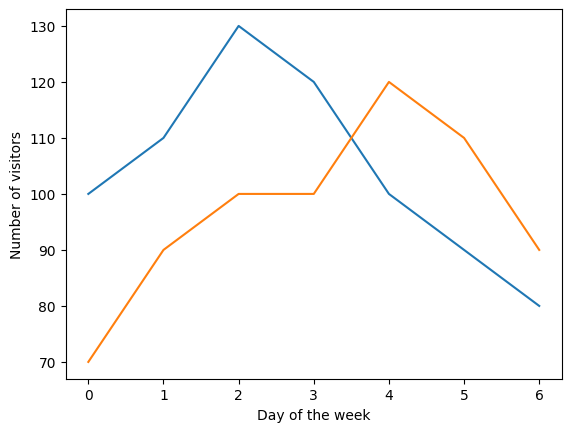

In [4]:
plt.plot(time_series_0)
plt.plot(time_series_1)
plt.xlabel("Day of the week")
plt.ylabel("Number of visitors")

# 3. Working on your datasets

This week, you can work on Milestone Two rather than having a particular exercise about working on your datasets

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 187-205 of the Storytelling With Data book as best you can. (Chapter Eight). You do not have to get the exact data values right, just the overall look and feel.

In [7]:
df = pd.read_csv('insurance_claims_mendeley.csv', parse_dates=['incident_date'])
num_cols_len = len(df.columns)
print(num_cols_len)


40


/tmp/ipykernel_4199/2309546196.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby([df['incident_date'], 'age_bracket'])['total_claim_amount'].sum().reset_index()


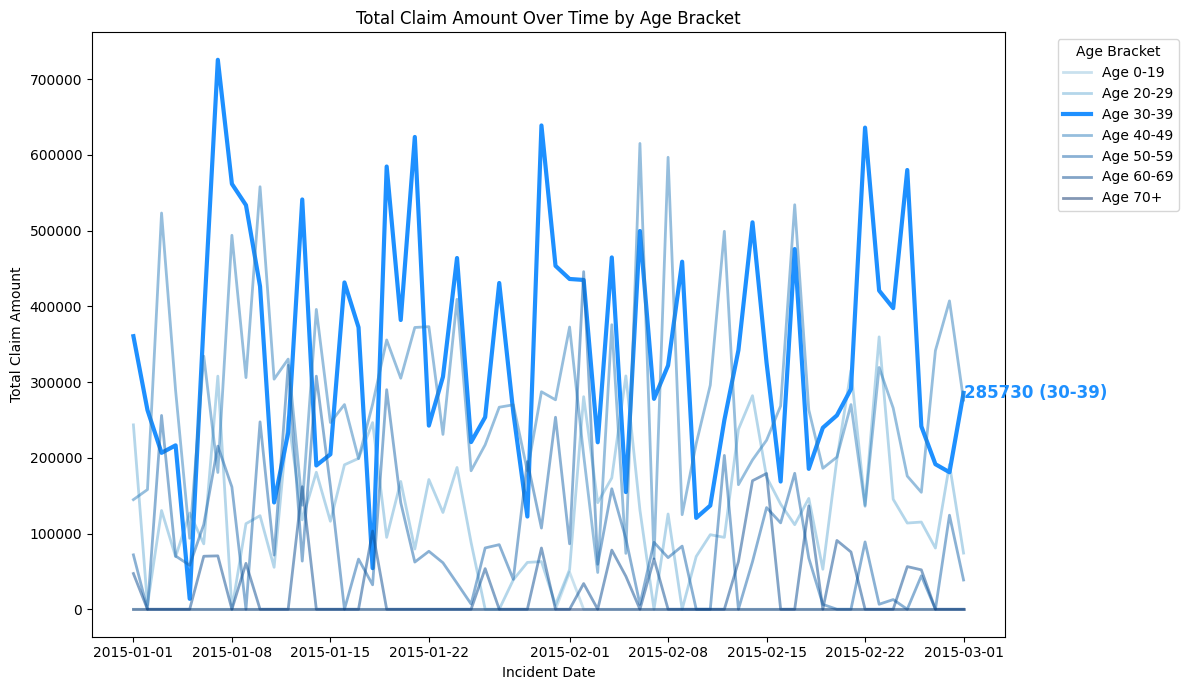

In [6]:
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('processed_insurance_claims.csv', parse_dates=['incident_date'])

# Create 10-year age bins
bins = [0, 19, 29, 39, 49, 59, 69, 120]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_bracket'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Group by incident_date and age_bracket, sum total_claim_amount
grouped = df.groupby([df['incident_date'], 'age_bracket'])['total_claim_amount'].sum().reset_index()

# Pivot so each age bracket is a column, indexed by date
pivot = grouped.pivot(index='incident_date', columns='age_bracket', values='total_claim_amount').fillna(0)

# Sort by date
pivot = pivot.sort_index()

# Plot
plt.figure(figsize=(12, 7))
colors = plt.cm.Blues(np.linspace(0.4, 1, len(pivot.columns)))
for idx, col in enumerate(pivot.columns):
    if col == '30-39':  # Example: highlight one line (change as needed)
        plt.plot(pivot.index, pivot[col], label=f'Age {col}', color='dodgerblue', linewidth=3)
        # Annotate last point
        plt.text(pivot.index[-1], pivot[col].iloc[-1], f'{int(pivot[col].iloc[-1])} ({col})', 
                 color='dodgerblue', fontsize=12, fontweight='bold', va='center')
    else:
        plt.plot(pivot.index, pivot[col], label=f'Age {col}', color=colors[idx], linewidth=2, alpha=0.5)

plt.xlabel('Incident Date')
plt.ylabel('Total Claim Amount')
plt.title('Total Claim Amount Over Time by Age Bracket')
plt.legend(title='Age Bracket', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

